# Data Loading and Analysis

In [ ]:
!pip install datasets
!pip install transformers
!pip install bertviz
!pip install umap-learn


In [ ]:
import datasets


In [ ]:
import datasets
print(datasets.__version__)


4.0.0


In [ ]:
from datasets import load_dataset_builder
datasets_list = list_datasets()




In [ ]:
'dair-ai/emotion' in datasets_list

False

In [ ]:
!pip install huggingface_hub

In [3]:
from huggingface_hub import list_datasets

datasets_list = list_datasets()


In [4]:
from datasets import load_dataset

dataset = load_dataset('emotion')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
dataset.set_format('pandas')
dataset['train'][:]

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [7]:
df = dataset['train'][:]

In [8]:
df['label'].unique()

array([0, 3, 2, 5, 4, 1])

In [9]:
classes = dataset['train'].features['label'].names
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [10]:
df['label_name'] = df['label'].apply(lambda x: classes[x])


In [ ]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [11]:
label_count = df['label_name'].value_counts()
label_count

,count
label_name,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


In [12]:
import matplotlib.pyplot as plt


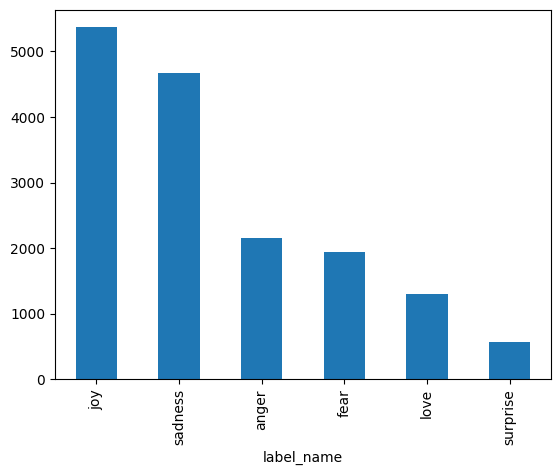

In [13]:
label_count.plot(kind='bar')
plt.show()

In [14]:
df['word_per_tweet'] = df['text'].str.split().apply(len)
df

,text,label,label_name,word_per_tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


In [ ]:
df['word_per_tweet'].max()

66

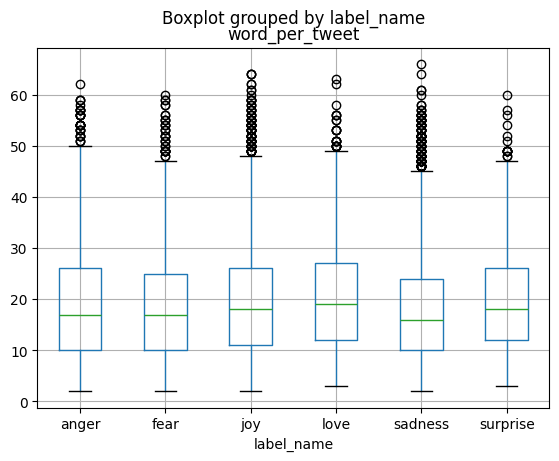

In [ ]:
df.boxplot('word_per_tweet', by='label_name')
plt.show()

# Tokenization of the Emotion Data

In [15]:
from transformers import AutoTokenizer
model_name = 'distilbert/distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [ ]:
text = 'I love AI'
tokens = tokenizer(text)
tokens

{'input_ids': [101, 1045, 2293, 9932, 102], 'attention_mask': [1, 1, 1, 1, 1]}

In [17]:
tokenizer.vocab_size, tokenizer.model_max_length

(30522, 512)

In [16]:
dataset.reset_format()

In [18]:
def tokenize(batch):
    temp = tokenizer(batch['text'], padding=True, truncation=True)
    return temp
print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [19]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [20]:
dataset_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

# Model Building and fine-tuning

In [21]:
from transformers import AutoModel
import torch

In [22]:
model = AutoModel.from_pretrained(model_name)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [23]:
from transformers import AutoModelForSequenceClassification

num_labels = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels = num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
device

device(type='cuda')

In [25]:
from transformers import TrainingArguments

In [28]:
batch_size = 64
num_epochs = 2
model_name1 = 'distilbert-emotion'
training_args = TrainingArguments(output_dir = model_name1,
                                  num_train_epochs = num_epochs,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size= batch_size,
                                  per_device_eval_batch_size= batch_size,
                                  weight_decay=0.01,
                                  eval_strategy ='epoch',
                                  disable_tqdm=False)

In [29]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [30]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded['train'],
                  eval_dataset=dataset_encoded['validation'],
                  tokenizer=tokenizer)

/tmp/ipython-input-320327302.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=training_args,


In [31]:
trainer.train()


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: midouarif4 (midouarif4-biskra) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.318056,0.907500,0.906003
2,0.530400,0.221204,0.923500,0.923299


TrainOutput(global_step=500, training_loss=0.5303727416992188, metrics={'train_runtime': 607.1371, 'train_samples_per_second': 52.706, 'train_steps_per_second': 0.824, 'total_flos': 720342861696000.0, 'train_loss': 0.5303727416992188, 'epoch': 2.0})

In [32]:
preds_outputs = trainer.predict(dataset_encoded['test'])
preds_outputs.metrics

{'test_loss': 0.22011247277259827,
 'test_accuracy': 0.916,
 'test_f1': 0.9151502397550035,
 'test_runtime': 4.7118,
 'test_samples_per_second': 424.464,
 'test_steps_per_second': 6.791}

In [34]:
import numpy as np
y_preds = np.argmax(preds_outputs.predictions, axis=1)
y_true = dataset_encoded['test'][:]['label']

In [35]:
from sklearn.metrics import classification_report
print(classes)
print(classification_report(y_true, y_preds))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       581
           1       0.93      0.94      0.94       695
           2       0.79      0.81      0.80       159
           3       0.93      0.90      0.92       275
           4       0.88      0.90      0.89       224
           5       0.84      0.62      0.71        66

    accuracy                           0.92      2000
   macro avg       0.89      0.86      0.87      2000
weighted avg       0.92      0.92      0.92      2000



In [37]:
label_count


,count
label_name,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


In [49]:
text = 'i will hit you'
input_encoded = tokenizer(text, return_tensors='pt').to(device)
with torch.no_grad():
  outputs = model(**input_encoded)

logits = outputs.logits
pred = torch.argmax(logits, dim=1).item()
pred, classes[pred]

(3, 'anger')